In [1]:
%config Completer.use_jedi = False

In [2]:
import glob
import pandas as pd
import numpy as np
import IPython.display as ipd #palying audio
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import os

SR = 16000

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

In [4]:
from sklearn.ensemble import RandomForestClassifier

In [5]:
from sklearn.model_selection import RandomizedSearchCV

In [6]:
import pandas as pd
import numpy as np

In [7]:
from functions.functions import read_data

In [8]:
x_train, x_test, x_val, y_train, y_test, y_val = read_data()

(50654, 192)


In [9]:
x_train.shape

(38748, 199)

In [10]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [11]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 2, verbose=2, random_state=42, n_jobs = 6)# Fit the random search model
rf_random.fit(x_train, y_train)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  20 out of  20 | elapsed: 41.9min finished


RandomizedSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=6,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=1)

In [ ]:
rf_random.predict_proba()

In [12]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
rf_random.best_params_

{'n_estimators': 2000,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 50,
 'bootstrap': False}

In [13]:
csv_paths = glob.glob(f'data_features/*.csv')

In [14]:
df_list = []
for path in csv_paths:
    df_list.append(pd.read_csv(path, index_col=0))

In [15]:
df = pd.concat(df_list)

In [16]:
df.shape

(50654, 192)

In [17]:
df.dropna(inplace=True)

In [18]:
df.shape

(50652, 192)

In [19]:
df.head()

,wave_mean,wave_median,wave_std,wave_min,wave_max,wave_amp,wave_SNR,wave_kurtosis,wave_skew,wave_percentile_10,...,fft_median,fft_std,fft_min,fft_max,fft_amp,fft_SNR,fft_entropy,fft_kurtosis,fft_skew,path
0,1.228929e-06,0.000011,0.006248,-0.027122,0.028381,0.055504,0.000197,-0.008426,0.004444,-0.008034,...,0.342434,2.297499,0.000819,182.828027,182.827208,0.428281,10.998455,704.125953,15.137748,data/0_dB_fan/fan/id_04/normal/00000003.wav
1,1.607037e-06,-0.000015,0.006322,-0.026340,0.027527,0.053867,0.000254,-0.008763,-0.002241,-0.008102,...,0.331919,2.310387,0.000181,155.277101,155.276921,0.444926,10.973155,469.721895,12.507023,data/0_dB_fan/fan/id_04/normal/00000013.wav
2,-3.350711e-06,-0.000023,0.006343,-0.027870,0.029667,0.057537,-0.000528,0.110686,-0.007385,-0.008083,...,0.296232,2.347009,0.000850,89.825543,89.824693,0.410604,10.883176,166.518501,9.184129,data/0_dB_fan/fan/id_04/normal/00000179.wav
3,-3.565311e-07,0.000019,0.006011,-0.024391,0.029037,0.053429,-0.000059,-0.027020,-0.005869,-0.007759,...,0.335397,2.211794,0.000227,228.107405,228.107178,0.426284,11.025086,1544.580957,21.418954,data/0_dB_fan/fan/id_04/normal/00000235.wav
4,2.297401e-07,-0.000011,0.006297,-0.024471,0.028271,0.052742,0.000036,-0.025103,0.020683,-0.008076,...,0.296857,2.339209,0.000702,140.548926,140.548224,0.399079,10.899445,367.845098,12.570095,data/0_dB_fan/fan/id_04/normal/00000186.wav


# Scaling

In [20]:
cols_scaling = df.drop('path', axis=1).columns

In [21]:
scaler = StandardScaler()

In [22]:
df[cols_scaling] = scaler.fit_transform(df[cols_scaling])

In [23]:
df.head()

,wave_mean,wave_median,wave_std,wave_min,wave_max,wave_amp,wave_SNR,wave_kurtosis,wave_skew,wave_percentile_10,...,fft_median,fft_std,fft_min,fft_max,fft_amp,fft_SNR,fft_entropy,fft_kurtosis,fft_skew,path
0,0.781484,-0.012980,-0.178824,0.664837,-0.612559,-0.649349,0.854288,-0.255541,-0.148438,0.133624,...,-0.494179,-0.152997,-0.365052,-0.090580,-0.090577,-0.221843,-0.275917,-0.310805,-0.370147,data/0_dB_fan/fan/id_04/normal/00000003.wav
1,0.951663,-0.302629,-0.150763,0.707282,-0.652169,-0.691081,1.028602,-0.255568,-0.188802,0.113658,...,-0.540384,-0.140203,-0.997969,-0.313880,-0.313872,-0.110574,-0.360836,-0.402176,-0.536880,data/0_dB_fan/fan/id_04/normal/00000013.wav
2,-1.279717,-0.385386,-0.142743,0.624256,-0.552968,-0.597500,-1.342557,-0.246074,-0.219863,0.119204,...,-0.697208,-0.103850,-0.334567,-0.844364,-0.844362,-0.340010,-0.662846,-0.520363,-0.747482,data/0_dB_fan/fan/id_04/normal/00000179.wav
3,0.067902,0.069777,-0.269444,0.813082,-0.582145,-0.702268,0.078532,-0.257019,-0.210709,0.213492,...,-0.525099,-0.238072,-0.952055,0.276409,0.276417,-0.235189,-0.186529,0.016802,0.027949,data/0_dB_fan/fan/id_04/normal/00000235.wav
4,0.331770,-0.261250,-0.160441,0.808734,-0.617687,-0.719778,0.368843,-0.256867,-0.050377,0.121422,...,-0.694461,-0.111593,-0.481079,-0.433252,-0.433248,-0.417050,-0.608239,-0.441887,-0.532883,data/0_dB_fan/fan/id_04/normal/00000186.wav


In [24]:
df.isna().any().any()

False

In [25]:
df.loc[:, 'machine'] = df['path'].apply(lambda string: string.split('/')[2])
df.loc[:, 'abnormal'] = df['path'].apply(lambda string: 1 if 'abnormal' in string else 0)
df.loc[:, 'id'] = df['path'].apply(lambda string: string.split('/')[3][3:])

In [26]:
df.groupby(['id', 'machine']).count()

wave_mean  wave_median  wave_std  wave_min  wave_max  wave_amp  \
id machine                                                                   
00 fan           4254         4254      4254      4254      4254      4254   
   pump          3447         3447      3447      3447      3447      3447   
   slider        4272         4272      4272      4272      4272      4272   
   valve         3330         3330      3330      3330      3330      3330   
02 fan           4125         4125      4125      4125      4125      4125   
   pump          3348         3348      3348      3348      3348      3348   
   slider        4005         4005      4005      4005      4005      4005   
   valve         2484         2484      2484      2484      2484      2484   
04 fan           3741         3741      3741      3741      3741      3741   
   pump          2406         2406      2406      2406      2406      2406   
   slider        2136         2136      2136      2136      2136      2136   
   valve         3360         3360      3360      3360      3360      3360   
06 fan           2752         2752      2752      2752      2752      2752   
   pump          2621         2621      2621      2621      2621      2621   
   slider        1298         1298      1298      1298      1298      1298   
   valve         3073         3073      3073      3073      3073      3073   

            wave_SNR  wave_kurtosis  wave_skew  wave_percentile_10  ...  \
id machine                                                          ...   
00 fan          4254           4254       4254                4254  ...   
   pump         3447           3447       3447                3447  ...   
   slider       4272           4272       4272                4272  ...   
   valve        3330           3330       3330                3330  ...   
02 fan          4125           4125       4125                4125  ...   
   pump         3348           3348       3348                3348  ...   
   slider       4005           4005       4005                4005  ...   
   valve        2484           2484       2484                2484  ...   
04 fan          3741           3741       3741                3741  ...   
   pump         2406           2406       2406                2406  ...   
   slider       2136           2136       2136                2136  ...   
   valve        3360           3360       3360                3360  ...   
06 fan          2752           2752       2752                2752  ...   
   pump         2621           2621       2621                2621  ...   
   slider       1298           1298       1298                1298  ...   
   valve        3073           3073       3073                3073  ...   

            fft_std  fft_min  fft_max  fft_amp  fft_SNR  fft_entropy  \
id machine                                                             
00 fan         4254     4254     4254     4254     4254         4254   
   pump        3447     3447     3447     3447     3447         3447   
   slider      4272     4272     4272     4272     4272         4272   
   valve       3330     3330     3330     3330     3330         3330   
02 fan         4125     4125     4125     4125     4125         4125   
   pump        3348     3348     3348     3348     3348         3348   
   slider      4005     4005     4005     4005     4005         4005   
   valve       2484     2484     2484     2484     2484         2484   
04 fan         3741     3741     3741     3741     3741         3741   
   pump        2406     2406     2406     2406     2406         2406   
   slider      2136     2136     2136     2136     2136         2136   
   valve       3360     3360     3360     3360     3360         3360   
06 fan         2752     2752     2752     2752     2752         2752   
   pump        2621     2621     2621     2621     2621         2621   
   slider      1298     1298     1298     1298     1298         1298   
   valve       3073     3073    

In [27]:
dummies = pd.get_dummies(df['machine'], prefix='Machine', drop_first=True)

In [28]:
df = df.join(dummies)

In [29]:
df.drop('machine', axis=1, inplace=True)

In [30]:
# Split train/test and validation sets

In [31]:
drop_list = ['path']

In [32]:
validation = df[df['id'] == '06'].drop(drop_list, axis=1)
train_test = df[df['id'] != '06'].drop(drop_list, axis=1)

In [33]:
df.head()

,wave_mean,wave_median,wave_std,wave_min,wave_max,wave_amp,wave_SNR,wave_kurtosis,wave_skew,wave_percentile_10,...,fft_SNR,fft_entropy,fft_kurtosis,fft_skew,path,abnormal,id,Machine_pump,Machine_slider,Machine_valve
0,0.781484,-0.012980,-0.178824,0.664837,-0.612559,-0.649349,0.854288,-0.255541,-0.148438,0.133624,...,-0.221843,-0.275917,-0.310805,-0.370147,data/0_dB_fan/fan/id_04/normal/00000003.wav,0,04,0,0,0
0,0.781484,-0.012980,-0.178824,0.664837,-0.612559,-0.649349,0.854288,-0.255541,-0.148438,0.133624,...,-0.221843,-0.275917,-0.310805,-0.370147,data/0_dB_fan/fan/id_04/normal/00000003.wav,0,04,1,0,0
0,0.781484,-0.012980,-0.178824,0.664837,-0.612559,-0.649349,0.854288,-0.255541,-0.148438,0.133624,...,-0.221843,-0.275917,-0.310805,-0.370147,data/0_dB_fan/fan/id_04/normal/00000003.wav,0,04,0,1,0
0,0.781484,-0.012980,-0.178824,0.664837,-0.612559,-0.649349,0.854288,-0.255541,-0.148438,0.133624,...,-0.221843,-0.275917,-0.310805,-0.370147,data/0_dB_fan/fan/id_04/normal/00000003.wav,0,04,0,0,1
0,-0.113684,-0.095736,0.581693,0.549098,-0.542889,-0.556643,-0.021190,-0.286161,-0.114633,-0.679472,...,-1.169520,0.231496,0.948489,1.748049,data/0_dB_pump/pump/id_04/normal/00000003.wav,0,04,0,0,0


In [34]:
train_test.shape

(158922, 196)

In [35]:
print((df == -np.inf).any().any())
print((df == np.inf).any().any())

False
False


In [36]:
model_diccie = {'rfc': RandomForestClassifier(verbose=1, n_jobs=-1),
                'svm': SVC(verbose=1, probability=True),
                'knn': KNeighborsClassifier(),
                'tree': DecisionTreeClassifier(),
               'lr': LogisticRegression(verbose=1,)}

# Split by id, 1/10th of data

rfc


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   17.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   44.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished


rfc: ROC AUC=0.539
svm
[LibSVM]

KeyboardInterrupt: 

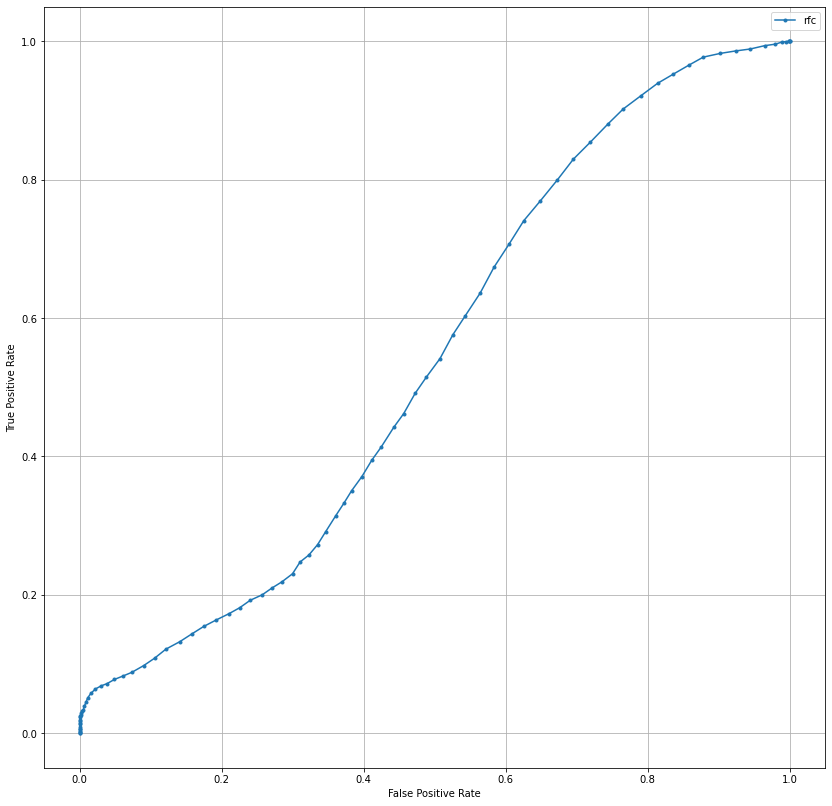

In [37]:
model_scores = {}
plt.figure(figsize=(14, 14))
plt.grid()
for model_key in model_diccie.keys():
    print(model_key)
    model_scores[model_key] = {}
    X_train = train_test[train_test['id'] != '04'].drop('abnormal', axis=1)[::1]
    X_test = train_test[train_test['id'] == '04'].drop('abnormal', axis=1)

    y_train = train_test[train_test['id'] != '04']['abnormal'][::1]
    y_test = train_test[train_test['id'] == '04']['abnormal']
    model = model_diccie[model_key]
    model.fit(X=X_train, y=y_train)
    probs = model.predict_proba(X_test)[:, 1]
    model_scores[model_key] = {'probs': probs, 'y_test': y_test}
    lr_auc = roc_auc_score(y_test, probs)
    print(model_key + ': ROC AUC=%.3f' % (lr_auc))

    # calculate roc curves
    lr_fpr, lr_tpr, _ = roc_curve(y_test, probs)
    # plot the roc curve for the model
    
    pyplot.plot(lr_fpr, lr_tpr, marker='.', label=model_key)
    # axis labels
    pyplot.xlabel('False Positive Rate')
    pyplot.ylabel('True Positive Rate')
    # show the legend
    pyplot.legend()
    # show the plot
pyplot.show()

In [ ]:
model_scores = {}
plt.figure(figsize=(14, 14))
plt.grid()
for model_key in model_diccie.keys():
    print(model_key)
    model_scores[model_key] = {}
    X_train = train_test[train_test['id'] != '04'].drop('abnormal', axis=1)[::5]
    X_test = train_test[train_test['id'] == '04'].drop('abnormal', axis=1)

    y_train = train_test[train_test['id'] != '04']['abnormal'][::5]
    y_test = train_test[train_test['id'] == '04']['abnormal']
    model = model_diccie[model_key]
    model.fit(X=X_train, y=y_train)
    probs = model.predict_proba(X_test)[:, 1]
    model_scores[model_key] = {'probs': probs, 'y_test': y_test}
    lr_auc = roc_auc_score(y_test, probs)
    print(model_key + ': ROC AUC=%.3f' % (lr_auc))
    # calculate roc curves
    lr_fpr, lr_tpr, _ = roc_curve(y_test, probs)
    # plot the roc curve for the model
    pyplot.plot(lr_fpr, lr_tpr, marker='.', label=model_key)
    # axis labels
    pyplot.xlabel('False Positive Rate')
    pyplot.ylabel('True Positive Rate')
    # show the legend
    pyplot.legend()
    # show the plot
pyplot.show()

# biased

In [ ]:
model_diccie = {'rfc': RandomForestClassifier(verbose=1, n_jobs=-1),
                #'svm': SVC(verbose=1, probability=True),
                'knn': KNeighborsClassifier(),
                'tree': DecisionTreeClassifier(),
               'lr': LogisticRegression(verbose=1)}

In [ ]:
model_scores = {}
plt.figure(figsize=(14, 14))
plt.grid()
for model_key in model_diccie.keys():
    print(model_key)
    model_scores[model_key] = {}
    X_train = train_test.drop('abnormal', axis=1)[::2]
    X_test = train_test.drop('abnormal', axis=1)[1::2]

    y_train = train_test['abnormal'][::2]
    y_test = train_test['abnormal'][1::2]
    model = model_diccie[model_key]
    model.fit(X=X_train, y=y_train)
    probs = model.predict_proba(X_test)[:, 1]
    model_scores[model_key] = {'probs': probs, 'y_test': y_test}
    lr_auc = roc_auc_score(y_test, probs)
    print(model_key + ': ROC AUC=%.3f' % (lr_auc))
    # calculate roc curves
    lr_fpr, lr_tpr, _ = roc_curve(y_test, probs)
    # plot the roc curve for the model
    pyplot.plot(lr_fpr, lr_tpr, marker='.', label=model_key)
    # axis labels
    pyplot.xlabel('False Positive Rate')
    pyplot.ylabel('True Positive Rate')
    # show the legend
    pyplot.legend()
    # show the plot
pyplot.show()

In [ ]:
model_diccie = {'rfc': RandomForestClassifier(verbose=1, n_jobs=-1),
                #'svm': SVC(verbose=1, probability=True),
                'knn': KNeighborsClassifier(),
                'tree': DecisionTreeClassifier(),
               'lr': LogisticRegression(verbose=1)}

In [ ]:
model_scores = {}
plt.figure(figsize=(14, 14))
plt.grid()
for model_key in model_diccie.keys():
    print(model_key)
    model_scores[model_key] = {}
    X_train = train_test[train_test['id'] != '04'].drop('abnormal', axis=1)[::1]
    X_test = train_test[train_test['id'] == '04'].drop('abnormal', axis=1)

    y_train = train_test[train_test['id'] != '04']['abnormal'][::1]
    y_test = train_test[train_test['id'] == '04']['abnormal']
    model = model_diccie[model_key]
    model.fit(X=X_train, y=y_train)
    probs = model.predict_proba(X_test)[:, 1]
    model_scores[model_key] = {'probs': probs, 'y_test': y_test}
    lr_auc = roc_auc_score(y_test, probs)
    print(model_key + ': ROC AUC=%.3f' % (lr_auc))

    # calculate roc curves
    lr_fpr, lr_tpr, _ = roc_curve(y_test, probs)
    # plot the roc curve for the model
    pyplot.plot(lr_fpr, lr_tpr, marker='.', label=model_key)
    # axis labels
    pyplot.xlabel('False Positive Rate')
    pyplot.ylabel('True Positive Rate')
    # show the legend
    pyplot.legend()
    # show the plot
pyplot.show()

# Feature Selection

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.feature_selection import SelectFromModel

In [ ]:
model = RandomForestClassifier(n_jobs=-1, random_state=42)

In [ ]:
df.head()

In [ ]:
X = df.drop(['path', 'abnormal'], axis=1)
y = df['abnormal']

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.1)

In [ ]:
mask_id_6 = x_train['id']=='06'

In [ ]:
mask_id_6

In [ ]:
x_train = x_train[~mask_id_6]
y_train = y_train[~mask_id_6]

In [ ]:
x_train.head()

In [ ]:
y_train.head()

In [ ]:
mask_id_4 = x_train['id'] == '04'

In [ ]:
x_test = x_train[mask_id_4]
x_train = x_train[~mask_id_4]

y_test = y_train[mask_id_4]
y_train = y_train[~mask_id_4]

In [ ]:
y_test.shape

In [ ]:
x_test.shape

In [ ]:
model.fit(x_train, y_train)
probs = model.predict_proba(x_test)[:, 1]
auc = roc_auc_score(y_test, probs)
auc_previous = auc

In [ ]:
drop_now = []
drop_final = []

model.fit(x_train, y_train)
probs = model.predict_proba(x_test)[:, 1]
auc_previous = roc_auc_score(y_test, probs)

In [ ]:
feat_imp = pd.DataFrame({'feat_imp': model.feature_importances_, 'feat': x_train.columns})

In [ ]:
feat_imp.set_index('feat_imp', inplace=True)

In [ ]:
dropped = []

In [ ]:
improve = {}

In [ ]:
for i, feat in enumerate(feat_imp['feat']):
    model.fit(x_train.drop(feat, axis=1), y_train)
    probs = model.predict_proba(x_test.drop(feat, axis=1))[:, 1]
    auc_now = roc_auc_score(y_test, probs)
    if auc_now > auc_previous:
        x_train.drop(feat, axis=1, inplace=True)
        x_test.drop(feat, axis=1, inplace=True)
        dropped.append(feat)
    print(i, feat)
    improve[feat] = auc_now-auc_previous
    print(auc_previous, auc_now, auc_now-auc_previous)
    print('*************\n')
    auc_previous = max(auc_now, auc_previous)

In [ ]:
feat_imp.sort_index(inplace=True)
#feat_imp.set_index('feat_imp', inplace=True)

dropped1 = []
improve1 = {}

In [ ]:
feat_imp

In [ ]:
model.fit(x_train[::5], y_train[::5])
probs = model.predict_proba(x_test[::5])[:, 1]
auc_tiny = roc_auc_score(y_test[::5], probs)

In [ ]:
model.feature_importances_.shape

In [ ]:
x_train.columns.shape

In [ ]:
feat_imp = pd.DataFrame({'feat_imp': model.feature_importances_, 'feat': x_train.columns})
feat_imp.sort_index(inplace=True)
dropped1 = []
improve1 = {}

In [ ]:
for i, feat in enumerate(feat_imp['feat']):
    model.fit(x_train.drop(feat, axis=1)[::5], y_train[::5])
    probs = model.predict_proba(x_test.drop(feat, axis=1)[::5])[:, 1]
    auc_now = roc_auc_score(y_test[::5], probs)
    if auc_now > auc_tiny:
        dropped1.append(feat)
    print(i, feat)
    improve1[feat] = auc_now-auc_tiny
    print(auc_previous, auc_now, auc_now-auc_tiny)
    print('*************\n')
    auc_previous = max(auc_now, auc_previous)

In [ ]:
a = ['a']
b = ['b']

In [ ]:
b.append(a)

In [ ]:
b + ['a']

In [39]:
from functions.hyperparameter_tuning import ParamaterTuning
pt = ParamaterTuning()
pt.read_data()
pt.tune_params

In [40]:
pt = ParamaterTuning()

In [41]:
pt.read_data()

TypeError: read_data() got an unexpected keyword argument 'cv'

In [8]:
import pickle

In [9]:
from functions.functions import read_data

In [10]:
loaded_model = pickle.load(open('models/rfc_tuned', 'rb'))

In [11]:
x_train_test, x_val, y_train_test, y_val = read_data(cv=True)

In [12]:
x_train_testid, x_valid, y_train_testid, y_valid = read_data(cv=True, ID=True)

In [39]:
from sklearn.metrics import precision_score, accuracy_score



In [ ]:
accuracy_score(true_values, predictions), precision_score(true_values, predictions)

In [45]:
(x_train_testid['machine']==machine) & (x_train_testid['id']==i)

7135     False
1968     False
2540     False
10788    False
5686     False
         ...  
11284    False
6327     False
11465    False
860      False
923       True
Length: 45586, dtype: bool

In [50]:
((x_train_testid['machine']==machine) & (x_train_testid['id']==i)).shape

(45586,)

In [49]:
x_val

,wave_mean,wave_median,wave_std,wave_min,wave_max,wave_amp,wave_SNR,wave_kurtosis,wave_skew,wave_percentile_10,...,machine,id,Machine_fan,Machine_pump,Machine_slider,Machine_valve,id_00,id_02,id_04,id_06
8992,-0.462046,-0.095736,-0.980034,1.134625,-1.225620,-1.207333,-0.862069,-0.250220,-0.428054,0.924535,...,slider,00,0,0,1,0,1,0,0,0
7180,0.250238,0.111156,-0.597244,0.841448,-1.004409,-0.947894,0.286854,-0.252794,-0.289249,0.551709,...,fan,02,1,0,0,0,0,1,0,0
11594,2.652729,0.855968,1.328336,-0.410147,0.061861,0.226732,1.859043,-0.256039,-0.436323,-1.336161,...,fan,00,1,0,0,0,1,0,0,0
2831,-0.050201,0.069777,-0.569710,0.492368,-0.492670,-0.502363,-0.100744,-0.246689,-0.256701,0.530633,...,pump,02,0,1,0,0,0,1,0,0
10457,-0.879600,-0.219872,1.047028,-0.098542,-0.288611,-0.112474,-0.530297,-0.266721,-0.335272,-1.072154,...,pump,02,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8097,0.775539,0.152534,0.483830,-1.028387,0.582971,0.803880,0.719679,-0.207477,-0.276728,-0.437651,...,pump,04,0,1,0,0,0,0,1,0
1637,-2.344773,0.049088,1.251580,-0.316562,0.237273,0.279262,-1.474913,-0.245397,-0.405614,-1.219798,...,slider,00,0,0,1,0,1,0,0,0
1748,-0.622191,-0.095736,-0.463683,-0.174321,-0.093747,0.030329,-0.782576,-0.216978,-0.253880,0.461969,...,pump,00,0,1,0,0,1,0,0,0
6400,-0.600644,-0.012980,-1.032731,1.152845,-1.076554,-1.133888,-1.133277,-0.251214,-0.406107,0.972234,...,fan,00,1,0,0,0,1,0,0,0


In [51]:
x_val[(x_val['machine']==machine) & (x_val['id']==i)]

,wave_mean,wave_median,wave_std,wave_min,wave_max,wave_amp,wave_SNR,wave_kurtosis,wave_skew,wave_percentile_10,...,machine,id,Machine_fan,Machine_pump,Machine_slider,Machine_valve,id_00,id_02,id_04,id_06
5178,-0.095334,-0.012980,-1.020489,-0.457146,-0.014706,0.206693,-0.280772,-0.111553,-0.099632,1.004403,...,pump,00,0,1,0,0,1,0,0,0
4685,-0.131100,-0.054358,-1.156291,0.303956,-0.429543,-0.379112,-0.398089,-0.191038,-0.277585,1.120876,...,pump,00,0,1,0,0,1,0,0,0
1913,0.192528,-0.137115,-0.708878,0.789893,-0.805301,-0.814137,0.208617,-0.252192,-0.113873,0.658310,...,pump,00,0,1,0,0,1,0,0,0
1297,-0.176952,-0.137115,-0.537919,0.765462,-0.659065,-0.722210,-0.255902,-0.253827,-0.218525,0.490810,...,pump,00,0,1,0,0,1,0,0,0
4847,0.102240,0.028399,-0.882501,0.570424,0.091391,-0.217729,0.065477,-0.189674,-0.226287,0.871290,...,pump,00,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8984,1.766007,-0.261250,1.230401,-0.399587,-0.020364,0.176537,1.299760,-0.260927,-0.164260,-1.256293,...,pump,00,0,1,0,0,1,0,0,0
9423,1.669516,0.028399,1.199425,-0.272461,0.148506,0.209709,1.242439,-0.254254,-0.198286,-1.223015,...,pump,00,0,1,0,0,1,0,0,0
1598,-0.076910,-0.137115,-0.306412,0.341638,-0.417872,-0.390396,-0.089274,-0.234462,-0.155621,0.296687,...,pump,00,0,1,0,0,1,0,0,0
9367,-0.880362,-0.757791,1.223840,-0.157136,-0.038400,0.052703,-0.494001,-0.261606,0.073218,-1.232000,...,pump,00,0,1,0,0,1,0,0,0


In [52]:
for machine in ['pump', 'valve', 'slider', 'fan']:
    for i in ['00', '02','04','06']:
        mask = (x_val['machine']==machine) & (x_val['id']==i)
        predictions = loaded_model.predict(x_val.drop(['machine', 'id'], axis=1)[mask])
        print(f'Result machine {machine}, id {i}:', precision_score(y_val[mask], predictions))

Result machine pump, id 00: 1.0
Result machine pump, id 02: 1.0
Result machine pump, id 04: 1.0
Result machine pump, id 06: 1.0
Result machine valve, id 00: 1.0
Result machine valve, id 02: 1.0
Result machine valve, id 04: 1.0
Result machine valve, id 06: 1.0
Result machine slider, id 00: 1.0
Result machine slider, id 02: 1.0
Result machine slider, id 04: 1.0
Result machine slider, id 06: 1.0
Result machine fan, id 00: 0.9885057471264368
Result machine fan, id 02: 1.0
Result machine fan, id 04: 1.0
Result machine fan, id 06: 0.9811320754716981


In [13]:
probs = loaded_model.predict_proba(x_val.drop(['machine', 'id'], axis=1))

In [15]:
y_val.shape

(5066,)

In [16]:
x_val.shape

(5066, 201)

In [21]:
y_val.shape

(5066,)

In [33]:
probs[:, 1]+0.3

array([0.34080146, 0.3       , 0.53752277, ..., 0.35801457, 1.00601093,
       0.34672131])

: ROC AUC=0.994


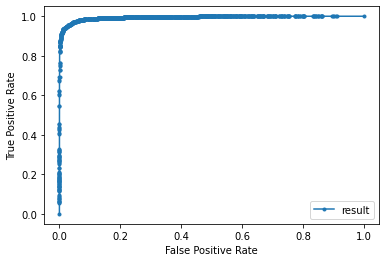

In [35]:
lr_auc = roc_auc_score(y_val, probs[:, 1])
print(': ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_val, probs[:, 1])
# plot the roc curve for the model

plt.plot(lr_fpr, lr_tpr, marker='.', label='result')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()